Importing Libraries

In [45]:
import numpy as np 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 

Dependent and Independent Variables

In [46]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features
		if end_ix > len(timeseries_data)-1:
			break
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [47]:
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
n_steps = 3
X, y = prepare_data(timeseries_data, n_steps)

Printing X and y

In [48]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

Checking the shape of X and y

In [49]:
print(X.shape)
print(y.shape)

(6, 3)
(6,)


Reshape from  [samples, timesteps]  --->  [samples, timesteps, features]

In [51]:
n_features = 1 
X = X.reshape((X.shape[0], X.shape[1], n_features))

Making the model - LSTM

In [54]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(nsteps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=400, verbose=1)

Epoch 1/400
1/1 [==============================] - 3s 3s/step - loss: 31259.3691
Epoch 2/400
1/1 [==============================] - 0s 17ms/step - loss: 30134.9219
Epoch 3/400
1/1 [==============================] - 0s 18ms/step - loss: 28952.6543
Epoch 4/400
1/1 [==============================] - 0s 17ms/step - loss: 27699.3379
Epoch 5/400
1/1 [==============================] - 0s 13ms/step - loss: 26391.5098
Epoch 6/400
1/1 [==============================] - 0s 18ms/step - loss: 25146.9609
Epoch 7/400
1/1 [==============================] - 0s 20ms/step - loss: 24056.2246
Epoch 8/400
1/1 [==============================] - 0s 11ms/step - loss: 23104.9062
Epoch 9/400
1/1 [==============================] - 0s 13ms/step - loss: 22176.1660
Epoch 10/400
1/1 [==============================] - 0s 17ms/step - loss: 21083.6406
Epoch 11/400
1/1 [==============================] - 0s 12ms/step - loss: 19676.3262
Epoch 12/400
1/1 [==============================] - 0s 12ms/step - loss: 18289.5176
Epo

Checking for the next 10 days

In [55]:
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, nsteps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, nsteps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[222.93286]
1 day input [196.         210.         222.93286133]
1 day output [[231.72153]]
2 day input [210.         222.93286133 231.7215271 ]
2 day output [[245.25641]]
3 day input [222.93286 231.72153 245.25641]
3 day output [[257.52173]]
4 day input [231.72153 245.25641 257.52173]
4 day output [[267.53073]]
5 day input [245.25641 257.52173 267.53073]
5 day output [[280.9491]]
6 day input [257.52173 267.53073 280.9491 ]
6 day output [[293.47733]]
7 day input [267.53073 280.9491  293.47733]
7 day output [[305.2185]]
8 day input [280.9491  293.47733 305.2185 ]
8 day output [[319.14478]]
9 day input [293.47733 305.2185  319.14478]
9 day output [[332.71872]]
[222.93286, 231.72153, 245.25641, 257.52173, 267.53073, 280.9491, 293.47733, 305.2185, 319.14478, 332.71872]


Testing

In [56]:
timeseriesdata 

[100, 265, 134, 150, 170, 180, 187, 190, 200]

In [57]:
len(timeseriesdata)

9

In [58]:
lst_output

[222.93286,
 231.72153,
 245.25641,
 257.52173,
 267.53073,
 280.9491,
 293.47733,
 305.2185,
 319.14478,
 332.71872]

Visualizing the data

Importing matplotlib

In [59]:
import matplotlib.pyplot as plt

In [60]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

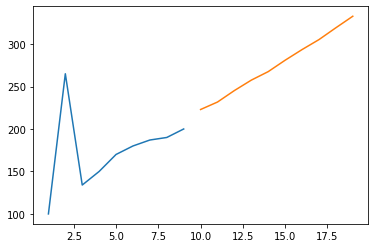

In [61]:
plt.plot(day_new,timeseriesdata)
plt.plot(day_pred,lst_output)